# Visualisierung von Messwerten und lineare Regression

Nachdem wir uns mit Datenvisualisierung beschäftigt haben, werden wir in diesem Vorlesungsskript das Gelernte auf Messdaten anwenden. Dazu erarbeiten wir uns, wie MATLAB Messdaten importiert und verarbeitet werden. Darüber hinaus versuchen wir, in den Messdaten Muster zu finden, oder mathematisch ausgedrückt, an die Messdaten ein Regressionspolynom anzupassen.

## Import von Messdaten

Messwerte werden normalerweise nicht händisch in ein MATLAB Live Script eingegeben. Meist werden Daten durch einen Sensor in eine Textdatei gespeichert oder in einer Excel-Datei erfasst. In der Wissenschaft ist es üblich, Messdaten im csv-Format abzuspeichern. Dabei steht **csv** für **comma separated values**, d.h. in einer Textdatei wird pro Messung eine Zeile verwendet und alle Daten pro Messung werden in diese Zeile durch Komma getrennt geschrieben. 

In einer  csv-Datei können auch Kommentare stehen. Das ist beispielsweise sinnvoll, um die Quelle der Daten zu notieren. MATLAB interpretiert die ersten Zeile nach eventuellen Kommentaren als Spaltenüberschriften, wenn beim Import dort Strings vorgefunden werden. Dabei dürfen keine Leerzeichen oder Umlaute in den Strings vorkommen, sonst gibt es eine Fehlermeldung und MATLAB konvertiert die Spaltenüberschriften eigenmächtig.

Im Folgenden betrachten wir uns den weltweiten CO2-Ausstoß bis 2020 in metrischen Tonnen pro Einwohner (Quelle: [https://data.worldbank.org](https://data.worldbank.org/indicator/EN.ATM.CO2E.PC).

Die ersten Zeilen der csv-Datei sehen so aus: 

% source: https://data.worldbank.org/indicator/EN.ATM.CO2E.PC, license: CC BY-NC 4.0, modified by Simone Gramsch

Jahr,"Metrische_Tonnen_pro_Einwohner"

1990,3.90295218998934

1991,3.87459045104576

1992,3.80401065140913

1993,3.76932773275631

1994,3.73238510585118

1995,3.78198265021746

...

Als nächstes laden wir unsere Messdaten in den Speicher.

Der Befehl zum Lesen einer csv-Datei lautet (für mehr Informationen siehe [MATLAB-Dokumentation](https://de.mathworks.com/help/matlab/ref/readtable.html):

```matlab
A=readtable('dateiname.csv')
```

Meistens werden die Daten mit einem Komma `,` getrennt, manchmal - vor allem im deutschsprachigen Raum - auch mit einem Semikolon `;`. Durch Angabe des Separators, also dem Trennzeichen, können wir direkt beim Einlesen schon das richtige einstellen, für viele deutschsprachige Dokumente also 

```matlab
A = readtable(dateiname, 'Delimiter',';', 'decimal', ',')
```

mit dem Komma als Dezimaltrennzeichen und nicht als Trennzeichen zwischen Spalten. 

Die Daten in der csv sind aber bereits wie üblich formatiert, so dass wir die CO2-Emissionen direkt ohne optionale Parameter laden können. Die Zeile mit dem Kommentarzeichen wird dabei übersprungen. 

Wir gehen davon aus, dass die Datei in einem Verzeichnis namens data liegt.

In [1]:
data = readtable('data/co2_emissionen_worldwide.csv')

Wir können direkt auf die Tabelleninhalte zugreifen, wenn wir geschweifte Klammern benutzen. Mit dem Doppelpunkt-Operator `:` und dem Spaltennamen schneiden wir die komplette Spalte aus der Tabelle heraus:

In [2]:
x = data{:,'Jahr'};
y = data{:,'Metrische_Tonnen_pro_Einwohner'};

disp(x);
disp(y);

        1990
        1991
        1992
        1993
        1994
        1995
        1996
        1997
        1998
        1999
        2000
        2001
        2002
        2003
        2004
        2005
        2006
        2007
        2008
        2009
        2010
        2011
        2012
        2013
        2014
        2015
        2016
        2017
        2018

    3.9030
    3.8746
    3.8040
    3.7693
    3.7324
    3.7820
    3.8067
    3.8135
    3.7806
    3.7478
    3.8127
    3.8277
    3.8348
    3.9585
    4.0923
    4.1963
    4.2810
    4.3919
    4.3769
    4.2771
    4.4832
    4.5695
    4.5765
    4.6065
    4.5560
    4.4835
    4.4313
    4.4355
    4.4777



```{exercise}
:label: exercise_08_01
Speichern Sie nur die Messungen der Jahre 2010 bis 2020 in einem x- und einem y-Array.
```
````{solution} exercise_08_01
:label: solution_08_01
:class: dropdown
```matlab
x = data{11:21,'Jahr'};
y = data{11:21,'Metrische_Tonnen_pro_Einwohner'};
```
````

Sobald die Messdaten in einem normalen MATLAB-Array vorliegen, können wir sie wie gewohnt weiterverarbeiten. Als erstes visualisieren wir die Messdaten und nehmen dazu ein Streudiagramm.

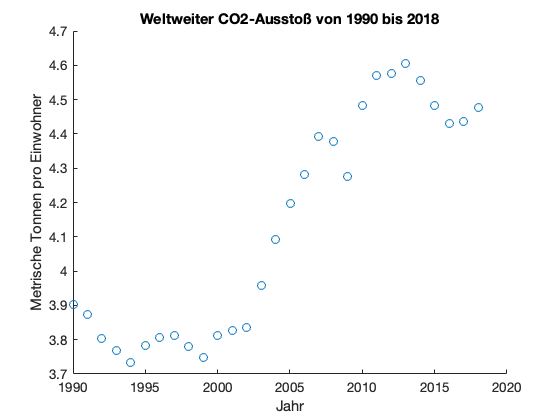

In [3]:
figure();
scatter(x,y);
xlabel('Jahr');
ylabel('Metrische Tonnen pro Einwohner');
title('Weltweiter CO2-Ausstoß von 1990 bis 2018');

```{exercise}
:label: exercise_08_02
Importieren Sie den Datensatz zur Bundesligasaison 2020/21 von Bayern München (Dateiname 'bayern_muenchen_2020.csv'). Visualisieren Sie, wie viele Minuten jeder Spieler in dieser Saison auf dem Platz gestanden hat (x ist die Spalte 'Name', y die Spalte 'Mins' ).
* Welches Diagramm passt am besten, Linien-, Balken- oder Streudiagramm?
* Welcher Spieler hatte die meiste Spielzeit?
```
````{solution} exercise_08_02
:label: solution_08_02
:class: dropdown
```matlab
% Import Messdaten
data = readtable('bayern_muenchen_2020.csv');
x = categorical(data{:,'Name'});
y = data{:,'Mins'};

% Datenvisualisierung
figure();
bar(x,y);
xlabel('Spieler');
ylabel('Minuten');
title('Bundesligasaison 2020/21');
```
````

## Regression - ein wenig Theorie

Kehren wir zu unserem Beispiel mit dem weltweiten CO2-Austoß zurück. Bisher haben wir nur die Messwerte visualisiert. Wenn wir jetzt eine Prognose für das Jahr 2030 wagen wollen, brauchen wir ein Modell. Lassen wir CO2-Emissionen noch einmal zeichnen.

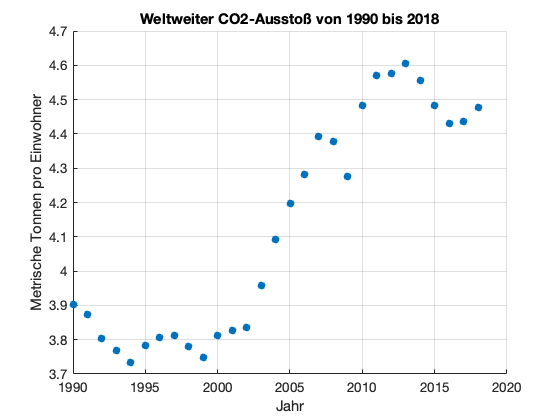

In [4]:
% Import Messdaten
data = readtable('data/co2_emissionen_worldwide.csv');
x = data{:,1};
y = data{:,2};

% Datenvisualisierung
figure();
scatter(x,y,'filled');
xlabel('Jahr'); ylabel('Metrische Tonnen pro Einwohner');
grid on;
title('Weltweiter CO2-Ausstoß von 1990 bis 2018')

Fangen wir mit dem einfachsten Modell an, diese Messdaten zu beschreiben, mit einer linearen Funktion.
In der Statistik beschäftigen sich Mathematikerinnen und Mathematiker bereits seit Jahrhunderten damit, Analyseverfahren zu entwickeln, mit denen experimentelle Daten gut erklärt werden können. Falls wir eine "erklärende" Variable (hier das Jahr) haben und wir versuchen, die Abhängigkeit einer Messgröße (hier die CO2-Emissionen pro Einwohner) von der erklärenden Variable zu beschreiben, nennen wir das **Regressionsanalyse** oder kurz **Regression**. Bei vielen Problemen suchen wir nach einem linearen Zusammenhang und sprechen daher von linearer Regression. Mehr Details finden Sie auch bei [Wikipedia (Regressionsanalyse)](https://de.wikipedia.org/wiki/Regressionsanalyse).

```{exercise}
:label: exercise_08_03
Denken Sie sich Werte für die Steigung m und den y-Achsenabschnitt b einer linearen Funktion  aus. Erzeugen Sie einen Vektor mit 100 x-Werten von 1990 bis 2018 und einen Vektor y mit $y=mx+b$. Lassen Sie diese lineare Funktion als durchgezogene rote Linie in den gleichen Plot wie die gepunkteten Messwerte zeichnen. Welche Werte für m und b müssen Sie wählen, damit die rote Linie passend zu den blauen Punkten ist? Spielen Sie mit m und b herum, bis es passen könnte.
```
````{solution} exercise_08_03
:label: solution_08_03
:class: dropdown
```matlab
x_modell = linspace(1990, 2018, 100);

m = 0.0344;
b = -64.7516;
y_modell = m * x_modell + b;

figure();
scatter(x,y, 'filled');
hold on;
plot(x_modell, y_modell, 'r-');
xlabel('Jahr'); ylabel('Metrische Tonnen pro Einwohner');
title('Weltweiter CO2-Ausstoß von 1990 bis 2018'); 
```
````

Wenn wir jetzt eine Prognose für das Jahr 2030 wagen wollen, können wir den Wert  in die lineare Funktion einsetzen und erhalten für 2030 einen CO2-Ausstoß von 5.1 metrischen Tonnen pro Einwohner :-(

Woher wissen wir eigentlich, dass diese Steigung $m$ und dieser y-Achsenabschnitt $b$ am besten passen? Dazu berechnen wir, wie weit weg die Gerade von den Messpunkten ist. Wie das geht, veranschaulichen wir uns mit der folgenden Grafik.

```{figure} pics/part08_regression.png
---
width: 600px
name: part08_regression
---
Messpunkte (blau) und der Abstand (grün) zu einer Modellfunktion (rot)

([Quelle:](https://de.wikipedia.org/wiki/Methode_der_kleinsten_Quadrate#/media/Datei:MDKQ1.svg) Autor: Christian Schirm, Lizenz: CC0) 
```

Unsere rote Modellfunktion trifft die Messpunkte mal mehr und mal weniger gut. Wir können jetzt für jeden Messpunkt berechnen, wie weit die rote Kurve von ihm weg ist (= grüne Strecke), indem wir die Differenz der y-Koordinaten errechnen: $r = y_{\text{blau}}-y_{\text{rot}}$. Diese Differenz nennt man **Residuum**. Danach summieren wir die Fehler (also die Residuen) auf und erhalten den Gesamtfehler. Leider kann es dabei passieren, dass am Ende als Gesamtfehler 0 herauskommt, weil beispielsweise für den 1. Messpunkt die blaue y-Koordinate unter der roten y-Koordinate liegt und damit ein negatives Residuum herauskommt, aber für den 5. Messpunkt ein positives Residuum. Daher quadrieren wir die Residuen. Und damit nicht der Gesamtfehler größer wird nur, weil wir mehr Messpunkte dazunehmen, teilen wir noch durch die Anzahl der Messpunkte $N$.

In [5]:
% blaue y-Koordinaten = Messpunkte
y_blau = data{:,2};

% Berechnung der roten y-Koordinaten, indem wir x-Koordinaten der Messpunkte
% in die Modellfunktion y = m*x + b einsetzen
x = data{:,1};
y_rot = 0.0344 * x - 64.7516;

% Berechnung Gesamtfehler
N = size(x, 1);
gesamtfehler = 1/N * sum( (y_blau - y_rot).^2 );

fprintf('Der Gesamtfehler ist %g.', gesamtfehler);

Der Gesamtfehler ist 0.0224891.

Ist das jetzt groß oder klein? Liegt eine gute Modellfunktion vor, die die Daten gut nähert oder nicht? Um das zu beurteilen, berechnen wir wie groß der Fehler wäre, wenn wir nicht die roten y-Koordinaten der Modellfunktion in die Fehlerformel einsetzen, sondern einfach nur den Mittelwert als Schätzwert. Dafür stellt uns MATLAB die Funktion `mean()` zur Verfügung:

In [6]:
y_mittelwert = mean(y_blau);
gesamtfehler_mittelwert = 1/N * sum( (y_blau - y_mittelwert).^2 );

fprintf('Der Gesamtfehler für den Mittelwert als Schätzung ist %g.', gesamtfehler_mittelwert);

Der Gesamtfehler für den Mittelwert als Schätzung ist 0.101701.

Offensichtlich ist der Gesamtfehler für die Modellfunktion kleiner als wenn wir einfach nur immer den Mittelwert prognostizieren würden. Wir rechnen das in Prozent um:

In [7]:
relativer_fehler = gesamtfehler / gesamtfehler_mittelwert;

fprintf('Der relative Fehler der Modellfunktion im Verhältnis zum Fehler beim Mittelwert ist: %.4f', relativer_fehler);
fprintf('In Prozent umgerechnet ist das: %.2f %%.', relativer_fehler * 100);

Der relative Fehler der Modellfunktion im Verhältnis zum Fehler beim Mittelwert ist: 0.2211In Prozent umgerechnet ist das: 22.11 %.

In der Statistik wurde diese Verhältnis (Gesamtfehler geteilt durch Gesamtfehler Mittelwert) als Qualitätkriterium für ein lineares Regressionsproblem festgelegt. Genaugenommen, rechnet man 1 - Gesamtfehler /  (Gesamtfehler Mittelwert) und nennt diese Zahl Bestimmtheitsmaß $R^2$. Details finden Sie bei [Wikipedia (Bestimmtheitsmaß)](https://de.wikipedia.org/wiki/Bestimmtheitsmaß). Die Formel lautet:

$$R^2 = 1 - \frac{\sum_{i=1}^N (y_i - f(x_i))^2}{\sum_{i=1}^N(y_i-\bar{y})}. $$

Dabei kürzt sich das $\frac{1}{N}$ im Zähler und Nenner weg.
Nachdem der $R^2$-Wert ausgerechnet wurde, können wir nun die Qualität der Anpassung beurteilen:

* Wenn $R^2 = 1$  ist, dann gibt es den perfekten linearen Zusammenhang und die Modellfunktion ist eine sehr gute Anpassung an die Messdaten.
* Wenn $R^2 = 0$ oder gar negativ ist, dann funktioniert die lineare Modellfunktion überhaupt nicht.

## Regression mit MATLAB: polyfit

MATLAB unterstützt die Suche nach der Regressionspolynomen mit der Funktion `polyfit()`. Eine detaillierte Bechreibung finden Sieìn der [MATLAB-Dokumentation (polyfit)](https://de.mathworks.com/help/matlab/ref/polyfit.html). Aufgerufen wird polyfit mit

`p = polyfit(x,y,n)`

Dabei sind x und y die Arrays (Vektoren) der Messdaten und n ist der Polynomgrad. Für eine lineare Funktion setzen wir n = 1. Das Ergebnis ist ein Vektor p. Im ersten Eintrag des Vektors steht die Steigung, im zweiten der y-Achsenabschnitt.
Wenn wir einen höheren Polynomgrad verwenden, dann gibt uns p die Koeffizienten des Polynoms absteigend, also p(1) den Koeffizienten der höchsten Potenz, p(2) den Koeffizienten der zweithöchsten Potenz usw. bis p(n).

Wir visualisieren zunächst die folgenden sieben Messpunkte:

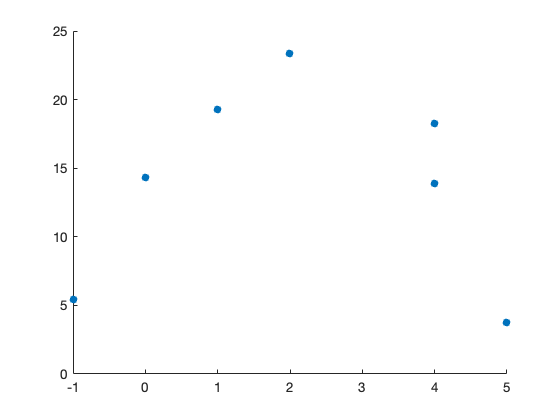

In [8]:
x = [-1, 0, 1, 2,  4, 4, 5];
y = [5.4384, 14.3252, 19.2451, 23.3703, 18.2885, 13.8978, 3.7586];

figure();
scatter(x,y, 'filled');

Sieht nicht nach einer linearen Funktion, also einer Geraden aus. Wir probieren es mit einer quadratischen Funktion. Die Modellfunktion lautet $f(x)=ax^2bx+c$ mit den Parametern $a$, $b$  und $c$. 
Wir setzen in der `polyfit()`-Funktion den Polynomgrad auf $n=2$.

In [9]:
p = polyfit(x, y, 2);

Jetzt hat der Rückgabewert der `polyfit()`-Funktion drei Werte:

In [10]:
whos p
disp(p)

  Name      Size            Bytes  Class     Attributes

  p         1x3                24  double              

   -2.0021    8.0906   14.7279



Der 1. Koeffizient -2.0021 ist der Koeffizient für die höchste Potenzfunktion, danach wird absteigend sortiert. Wir erhalten also als Regressionsfunktion

$$r(x)=-2.0021x^2 + 8.0906x + 14.7279.$$

Visualisieren wir die Modellfunktion zusammen mit den Messpunkten.

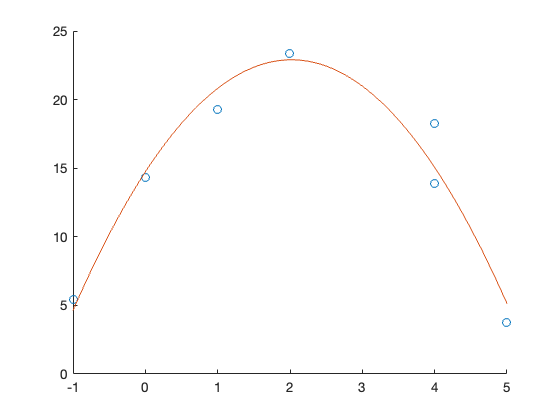

In [11]:
figure();
scatter(x,y);
hold on;
x_plot = linspace(-1, 5, 100);
y_plot = -2.0021 .* x_plot.^2 + 8.0906 .* x_plot + 14.7279;
plot(x_plot, y_plot);

Sieht eigentlich sehr gut aus. Zuletzt berechnen wir den $R^2$-Wert.

In [12]:
y_modell = -2.0021 .* x.^2 + 8.0906 .* x + 14.7279;
fehler_modell = sum( (y - y_modell).^2 );

y_mittelwert = mean(y);
fehler_mittelwert = sum( (y - y_mittelwert).^2 );

R2 = 1 - fehler_modell / fehler_mittelwert;
fprintf('R2-Bestimmtheitsmaß: %.4f', R2);

R2-Bestimmtheitsmaß: 0.9450

Der gute visuelle Eindruck bestätigt sich, das Regressionsmodell ist sehr gut.

## Zusammenfassung

Eine wichtige Anwendung von MATLAB ist die Analyse von Messdaten. Dazu haben wir uns in diesem Part mit dem Import von Messdaten, der Theorie der Regression und der Umsetzung der Regression in MATLAB mit Polyfit beschäftigt.

Darüber hinaus bietet MATLAB die Curve Fitting Toolbox an, um Messdaten zu modellieren.